----------------------------------
# Pima Indians Diabetes Analysis
----------------------------------


#####  Perform Exploratory Data Analysis to identify the impact of various attributes on the diabetes rates of the Pima Indians.

- This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
- Through the dataset we aim to get insights about the patterns in the disease, based on certain diagnostic measurements included in the dataset.
- Several constraints were placed on the selection of these instances from a larger database.
- In particular, all patients here are females at least 21 years old of Pima Indian heritage.
- The datasets consists of several medical predictor variables and one target variable.
- Predictor variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


--------------------------
### Attribute Information:
--------------------------

1. **Number of times pregnant**
2. **Plasma glucose concentration a 2 hours in an oral glucose tolerance test**
3. **Diastolic blood pressure (mm Hg)**
4. **Triceps skin fold thickness (mm):** Its thickness gives information about the fat reserves of the body
5. **2-Hour serum insulin (mu U/ml)**
6. **Body mass index (weight in kg/(height in m)^2)**
7. **Diabetes pedigree function**
8. **Age (years)**
9. **Class variable (0 or 1)**

------------------------
# Concepts to Cover
------------------------
- 1. <a href = #link1>Overview of the data</a>
- 2. <a href = #link2>Univariate and Bivariate Analysis</a>
- 3. <a href = #link3>Data Preprocessing</a>
- 4. <a href = #link4>Pandas Profiling</a> 

# Let's start coding!

<a id='link'></a>
### Import libraries

In [264]:
import warnings
warnings.filterwarnings('ignore')

In [265]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, MinMaxScaler

### Think about it:

- Why we use StandardScalar and MinMaxScalar from sklearn library?

In [266]:
# Adjust pandas display and formatting settings

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Increase cell width - If you don't want to change your default settings, and you only want to change the width of 
# the current notebook you're working on, you can enter the following into a cell:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Update default style - Set the aesthetic style of the plots.
# This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.
sns.set_style(style='whitegrid')

### Load and explore the data

In [267]:
df = pd.read_csv("pima-indians-diabetes.csv") # Load the data into pandas dataframe
# Make changes to the path depending on where your data file is stored /content/pima-indians-diabetes.csv
#df = pd.read_csv("https://www.kaggle.com/kumargh/pimaindiansdiabetescsv?select=pima-indians-diabetes.csv")

"""About this file
This dataset describes the medical records for Pima Indians and whether or not each patient 
will have an onset of diabetes within ve years.   Fields description follow:

preg = Number of times pregnant
plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test
pres = Diastolic blood pressure (mm Hg)
skin = Triceps skin fold thickness (mm)
test = 2-Hour serum insulin (mu U/ml)
mass = Body mass index (weight in kg/(height in m)^2)
pedi = Diabetes pedigree function
age = Age (years)
class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)"""

'About this file\nThis dataset describes the medical records for Pima Indians and whether or not each patient \nwill have an onset of diabetes within \x0cve years.   Fields description follow:\n\npreg = Number of times pregnant\nplas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test\npres = Diastolic blood pressure (mm Hg)\nskin = Triceps skin fold thickness (mm)\ntest = 2-Hour serum insulin (mu U/ml)\nmass = Body mass index (weight in kg/(height in m)^2)\npedi = Diabetes pedigree function\nage = Age (years)\nclass = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)'

# <a id='link1'>Overview of the data</a>

In [268]:
df.head()

Pregnant  Glucose  Pressure  Thickness  Insulin   Bmi  Pedigree  Age  \
0         6      148        72         35        0 33.60      0.63   50   
1         1       32        66         29        0 26.60      0.35   31   
2         8       54        64          0        0 23.30      0.67   29   
3         1       23        66         23       94 28.10      0.17   21   
4         0      137        40         35      168 43.10      2.29   33   

   Outcome  
0        1  
1        0  
2        1  
3        0  
4        1

## Think about it:

- What do you interpret by looking at the data in the first 5 rows?
- Do you see that each column has different scales of data.
    - e.g. "Pragnancies" column : from 0 to 8, as we can see.
    - Glucose: 85 to 183.
So, Consider two cases:
- Without scaling the data
- With using StandardScalar, MinMaxScalar

Will the result differ in each case or will be same?

In [269]:
# Check number of rows and columns
df.shape

(768, 9)

In [270]:
df.shape[0]

768

In [271]:
df.shape[1]

9

In [272]:
# Check column types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pregnant   768 non-null    int64  
 1   Glucose    768 non-null    int64  
 2   Pressure   768 non-null    int64  
 3   Thickness  768 non-null    int64  
 4   Insulin    768 non-null    int64  
 5   Bmi        768 non-null    float64
 6   Pedigree   768 non-null    float64
 7   Age        768 non-null    int64  
 8   Outcome    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


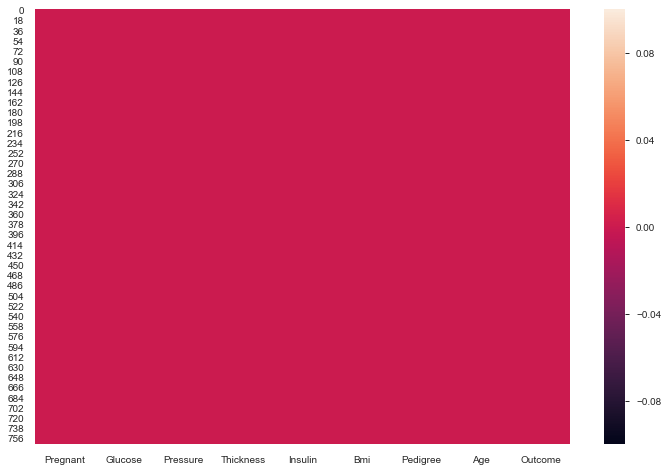

In [273]:
# Check missing values via heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isna())
plt.show()

## Think about it:
- What are some other ways to check the missing values?
# <a id = "link2">Univariate and Bivariate Analysis</a>
- How to interpret the average of a binary field?
- What can we tell about the shape of distributions from the summary statistics above?

In [274]:
# Example of a binary array
a = [1,1,1,1,1,1,0,0,0,0]

# Find the average of the binary array
np.mean(a)

0.6

- Is the average above or below the median in the distribution above?

In [275]:
# Create summary statistics for numeric fields
df.describe()

Pregnant  Glucose  Pressure  Thickness  Insulin    Bmi  Pedigree  \
count    768.00   768.00    768.00     768.00   768.00 768.00    768.00   
mean       3.85   120.57     69.11      20.54    79.80  32.00      0.47   
std        3.37    32.29     19.36      15.95   115.24   7.87      0.33   
min        0.00     0.00      0.00       0.00     0.00   0.00      0.08   
25%        1.00    99.00     62.00       0.00     0.00  27.30      0.24   
50%        3.00   117.00     72.00      23.00    30.50  32.00      0.37   
75%        6.00   140.00     80.00      32.00   127.25  36.60      0.63   
max       17.00   199.00    122.00      99.00   846.00  67.10      2.42   

         Age  Outcome  
count 768.00   768.00  
mean   33.24     0.35  
std    11.76     0.48  
min    21.00     0.00  
25%    24.00     0.00  
50%    29.00     0.00  
75%    41.00     1.00  
max    81.00     1.00

In [276]:
# Transpose
df.describe().T

count   mean    std   min   25%    50%    75%    max
Pregnant  768.00   3.85   3.37  0.00  1.00   3.00   6.00  17.00
Glucose   768.00 120.57  32.29  0.00 99.00 117.00 140.00 199.00
Pressure  768.00  69.11  19.36  0.00 62.00  72.00  80.00 122.00
Thickness 768.00  20.54  15.95  0.00  0.00  23.00  32.00  99.00
Insulin   768.00  79.80 115.24  0.00  0.00  30.50 127.25 846.00
Bmi       768.00  32.00   7.87  0.00 27.30  32.00  36.60  67.10
Pedigree  768.00   0.47   0.33  0.08  0.24   0.37   0.63   2.42
Age       768.00  33.24  11.76 21.00 24.00  29.00  41.00  81.00
Outcome   768.00   0.35   0.48  0.00  0.00   0.00   1.00   1.00

#### Skewness of the variables

In [277]:
df.skew()

Pregnant     0.90
Glucose      0.12
Pressure    -1.84
Thickness    0.11
Insulin      2.27
Bmi         -0.42
Pedigree     1.92
Age          1.13
Outcome      0.64
dtype: float64

**If skewness value is zero, then it is not skewed**

**If it is less than zero, then negatively skewed (left tail) and if greater than zero then positively skewed (right tail)**

Some insights about data:

- Data for all the attributes are skewed, especially for the variable "Insulin".

- The mean for "Insulin" is 80(rounded) while the median is 30.5 which clearly indicates an extreme long tail on the right.

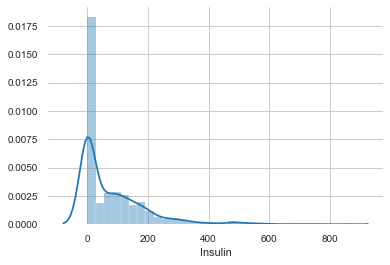

In [278]:
# Example of a skewed distribution (right tail)

sns.distplot(df['Insulin'])
plt.show()

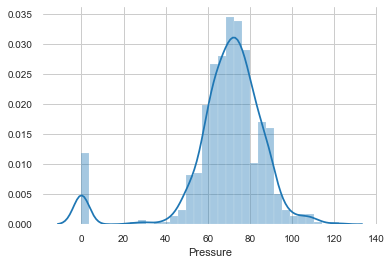

In [279]:
# Example of a skewed distribution (left tail)

sns.distplot(df['Pressure'])
plt.show()

#### Incorrect Imputations

In [280]:
df.applymap(np.isreal).all(1)

0      True
1      True
2      True
3      True
4      True
       ... 
763    True
764    True
765    True
766    True
767    True
Length: 768, dtype: bool

In [281]:
# Let us check whether any of the columns has any value other than numeric i.e. data is not corrupted such as a "?" instead of 
# a number.

# we use np.isreal a numpy function which checks each column for each row and returns a bool array, 
# where True if input element is real.
# applymap is pandas dataframe function that applies the np.isreal function elementwise

# Following line selects those rows which have some non-numeric value in any of the columns hence the  ~ symbol

df[~df.applymap(np.isreal).all(1)]

# this works only on continous columns.

Empty DataFrame
Columns: [Pregnant, Glucose, Pressure, Thickness, Insulin, Bmi, Pedigree, Age, Outcome]
Index: []

In [282]:
df['Outcome'].value_counts()
# See distrubtion of target variable

0    500
1    268
Name: Outcome, dtype: int64

In [283]:
df['Outcome'].value_counts()*100/df.shape[0]

0   65.10
1   34.90
Name: Outcome, dtype: float64

In [284]:
df['Outcome'].value_counts(normalize=True)*100
# See percentage distribution of target variable

0   65.10
1   34.90
Name: Outcome, dtype: float64

## Bivariate

In [285]:
# Let us look at the target column 'Outcome' to understand how the data is distributed amongst the various fields
df.groupby(["Outcome"]).mean()

Pregnant  Glucose  Pressure  Thickness  Insulin   Bmi  Pedigree   Age
Outcome                                                                       
0            3.30   109.74     68.18      19.66    68.79 30.30      0.43 31.19
1            4.87   140.78     70.82      22.16   100.34 35.15      0.55 37.06

In [286]:
# Let us look at the target column 'Outcome' to understand how the data is distributed amongst the various fields
df.groupby(["Outcome"]).median()

Pregnant  Glucose  Pressure  Thickness  Insulin   Bmi  Pedigree   Age
Outcome                                                                       
0            2.00   107.00     70.00      21.00    39.00 30.05      0.34 27.00
1            4.00   139.50     74.00      27.00     0.00 34.25      0.45 36.00

**All the features have higher mean for people having diabetes**

**All the features have higher median for people having diabetes except "Insulin" which is understood as diabetes patient do not produce insulin**

#### Pair plot

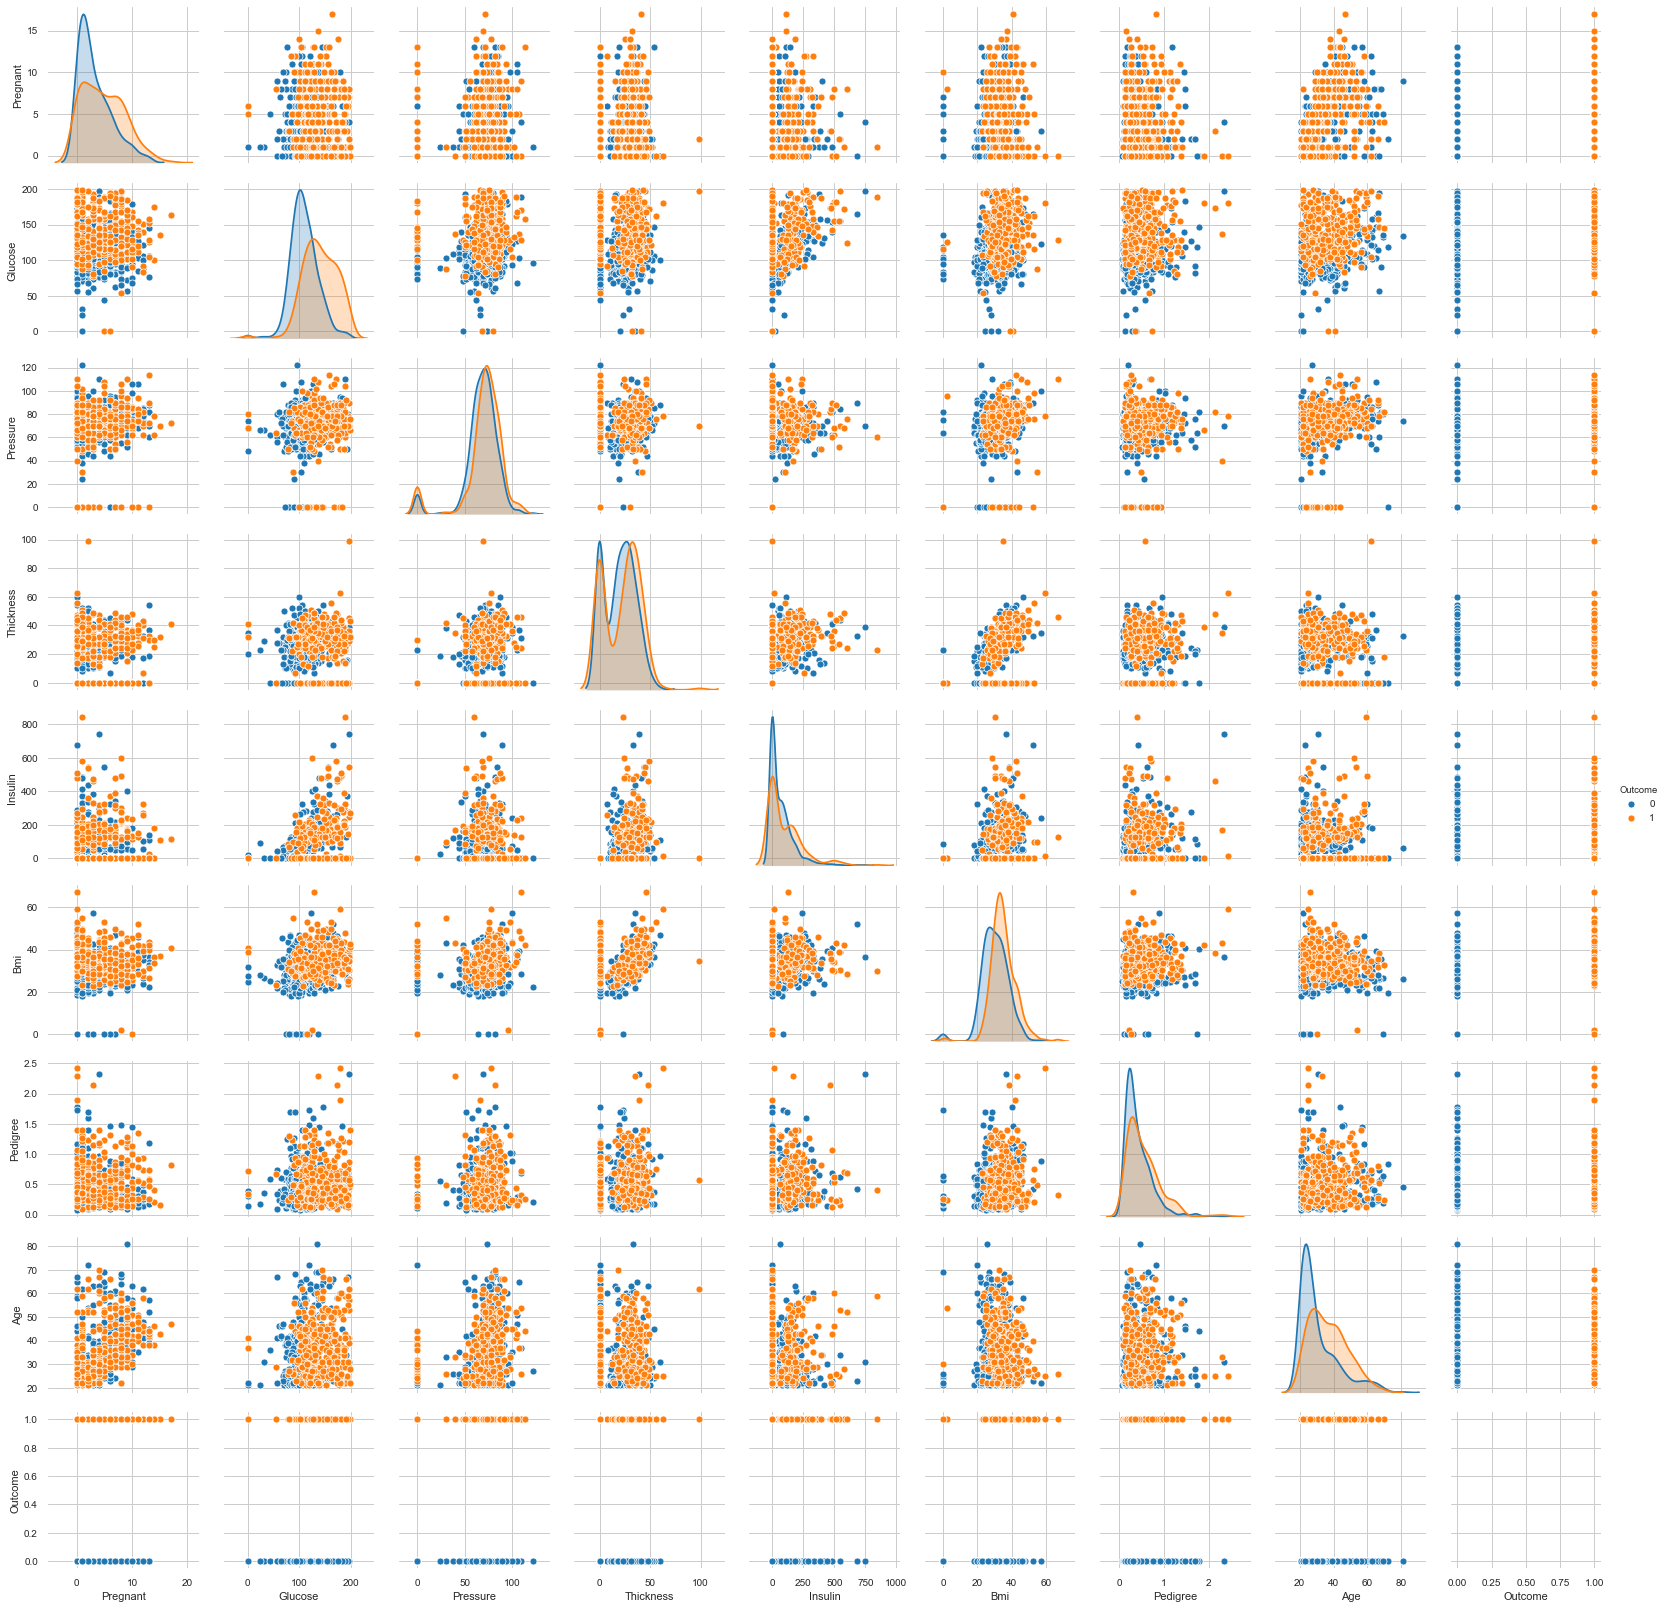

In [287]:
# Check distributions by Outcome
sns.pairplot(df, hue = 'Outcome')
plt.show()

### No clear relationship for any feature.

### Number of people having diabetes are higher for people with higher "Age", "BMI" and "Glucose".

#### Correlation with target variable is signficant when target variable is continous

Here we can check if any feature is correlated amongst them.

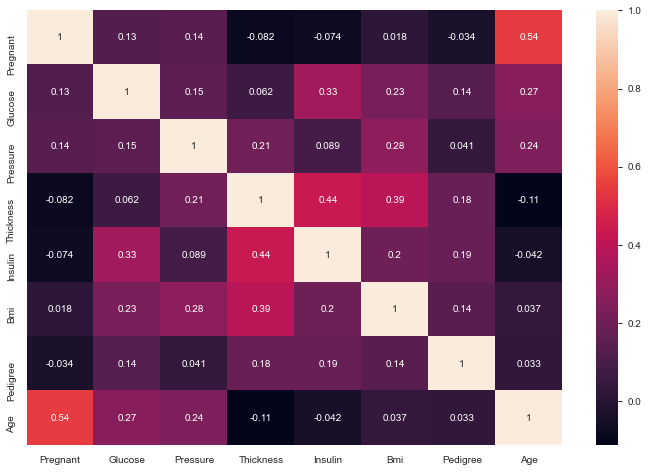

In [288]:
corr = df.drop('Outcome',axis=1).corr()
#corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

### No high correlation between features

# <a id='link3'>Data Preprocessing</a>

#### Exampes of data standardization using mean and standard deviation

In [289]:
print(type(df.apply(zscore)))
df.apply(zscore) #DataFrame

#print(type(df[['Age']].apply(zscore)))
#df[['Age']].apply(zscore) #DataFrame

#print(type((df[['Age']]-np.mean(df['Age']))/np.std(df['Age'])))
#(df[['Age']]-np.mean(df['Age']))/np.std(df['Age']) #DataFrame

#print(type((df['Age']-np.mean(df['Age']))/np.std(df['Age'])))
#(df['Age']-np.mean(df['Age']))/np.std(df['Age']) #Series

#print(type(StandardScaler().fit_transform(df[['Age']])))
#StandardScaler().fit_transform(df[['Age']]) #numpy.ndarray

<class 'pandas.core.frame.DataFrame'>


Pregnant  Glucose  Pressure  Thickness  Insulin   Bmi  Pedigree   Age  \
0        0.64     0.85      0.15       0.91    -0.69  0.20      0.47  1.43   
1       -0.84    -2.74     -0.16       0.53    -0.69 -0.69     -0.37 -0.19   
2        1.23    -2.06     -0.26      -1.29    -0.69 -1.11      0.60 -0.36   
3       -0.84    -3.02     -0.16       0.15     0.12 -0.50     -0.92 -1.04   
4       -1.14     0.51     -1.50       0.91     0.77  1.41      5.48 -0.02   
..        ...      ...       ...        ...      ...   ...       ...   ...   
763      1.83    -0.61      0.36       1.72     0.87  0.11     -0.91  2.53   
764     -0.55     0.04      0.05       0.41    -0.69  0.61     -0.40 -0.53   
765      0.34     0.01      0.15       0.15     0.28 -0.74     -0.69 -0.28   
766     -0.84     0.17     -0.47      -1.29    -0.69 -0.24     -0.37  1.17   
767     -0.84    -0.85      0.05       0.66    -0.69 -0.20     -0.47 -0.87   

     Outcome  
0       1.37  
1      -0.73  
2       1.37  
3      -0.73  
4       1.37  
..       ...  
763    -0.73  
764    -0.73  
765    -0.73  
766     1.37  
767    -0.73  

[768 rows x 9 columns]

In [290]:
# Multiple ways to implement Z score standardization

# Standardization of entire data set using "zscore" function from scipy.stats package 
df_z = df.apply(zscore)

# Manual standardization of individual fields
df['Age_Z_Manual'] = (df['Age']-np.mean(df['Age']))/np.std(df['Age'])

# Using "zscore" function from scipy.stats package 
df['Age_Z_Scipy'] = df[['Age']].apply(zscore)

# Using "StandardScaler" function from sklearn.preprocessing package - useful for machine learning models  
df['Age_Z_Sklearn'] = StandardScaler().fit_transform(df[['Age']])

In [291]:
# View the new data set with all standardized fields
df_z.head()

Pregnant  Glucose  Pressure  Thickness  Insulin   Bmi  Pedigree   Age  \
0      0.64     0.85      0.15       0.91    -0.69  0.20      0.47  1.43   
1     -0.84    -2.74     -0.16       0.53    -0.69 -0.69     -0.37 -0.19   
2      1.23    -2.06     -0.26      -1.29    -0.69 -1.11      0.60 -0.36   
3     -0.84    -3.02     -0.16       0.15     0.12 -0.50     -0.92 -1.04   
4     -1.14     0.51     -1.50       0.91     0.77  1.41      5.48 -0.02   

   Outcome  
0     1.37  
1    -0.73  
2     1.37  
3    -0.73  
4     1.37

In [292]:
# View existing data set with new Age standardized fields
df.head()

Pregnant  Glucose  Pressure  Thickness  Insulin   Bmi  Pedigree  Age  \
0         6      148        72         35        0 33.60      0.63   50   
1         1       32        66         29        0 26.60      0.35   31   
2         8       54        64          0        0 23.30      0.67   29   
3         1       23        66         23       94 28.10      0.17   21   
4         0      137        40         35      168 43.10      2.29   33   

   Outcome  Age_Z_Manual  Age_Z_Scipy  Age_Z_Sklearn  
0        1          1.43         1.43           1.43  
1        0         -0.19        -0.19          -0.19  
2        1         -0.36        -0.36          -0.36  
3        0         -1.04        -1.04          -1.04  
4        1         -0.02        -0.02          -0.02

### Zscore and Standard Scalar are same.

#### Exampes of data normalization using min and range

In [293]:
# Manual normalization
df['Age_Norm_Manual'] = (df['Age']-np.min(df['Age']))/(np.max(df['Age'])-np.min(df['Age']))

# Using "StandardScaler" function from sklearn.preprocessing package - useful for machine learning models  
df['Age_Norm_Sklearn'] = MinMaxScaler().fit_transform(df[['Age']])

In [294]:
df.head()

Pregnant  Glucose  Pressure  Thickness  Insulin   Bmi  Pedigree  Age  \
0         6      148        72         35        0 33.60      0.63   50   
1         1       32        66         29        0 26.60      0.35   31   
2         8       54        64          0        0 23.30      0.67   29   
3         1       23        66         23       94 28.10      0.17   21   
4         0      137        40         35      168 43.10      2.29   33   

   Outcome  Age_Z_Manual  Age_Z_Scipy  Age_Z_Sklearn  Age_Norm_Manual  \
0        1          1.43         1.43           1.43             0.48   
1        0         -0.19        -0.19          -0.19             0.17   
2        1         -0.36        -0.36          -0.36             0.13   
3        0         -1.04        -1.04          -1.04             0.00   
4        1         -0.02        -0.02          -0.02             0.20   

   Age_Norm_Sklearn  
0              0.48  
1              0.17  
2              0.13  
3              0.00  
4              0.20

In [295]:
df.describe().T

count   mean    std   min   25%    50%    75%    max
Pregnant         768.00   3.85   3.37  0.00  1.00   3.00   6.00  17.00
Glucose          768.00 120.57  32.29  0.00 99.00 117.00 140.00 199.00
Pressure         768.00  69.11  19.36  0.00 62.00  72.00  80.00 122.00
Thickness        768.00  20.54  15.95  0.00  0.00  23.00  32.00  99.00
Insulin          768.00  79.80 115.24  0.00  0.00  30.50 127.25 846.00
Bmi              768.00  32.00   7.87  0.00 27.30  32.00  36.60  67.10
Pedigree         768.00   0.47   0.33  0.08  0.24   0.37   0.63   2.42
Age              768.00  33.24  11.76 21.00 24.00  29.00  41.00  81.00
Outcome          768.00   0.35   0.48  0.00  0.00   0.00   1.00   1.00
Age_Z_Manual     768.00   0.00   1.00 -1.04 -0.79  -0.36   0.66   4.06
Age_Z_Scipy      768.00   0.00   1.00 -1.04 -0.79  -0.36   0.66   4.06
Age_Z_Sklearn    768.00   0.00   1.00 -1.04 -0.79  -0.36   0.66   4.06
Age_Norm_Manual  768.00   0.20   0.20  0.00  0.05   0.13   0.33   1.00
Age_Norm_Sklearn 768.00   0.20   0.20  0.00  0.05   0.13   0.33   1.00

#### Exampe of data transformation using natural logarithm

In [296]:
np.log([10,100,1000,10000,100000])

array([ 2.30258509,  4.60517019,  6.90775528,  9.21034037, 11.51292546])

In [297]:
# Log transformation of a skewed field using numpy log function
df['Age_Log'] = np.log(df['Age'])

# Log transformation of a skewed field with zeros
df['BloodPressure_Log'] = np.log(df['Pressure']+0.5)

In [298]:
df.head()

Pregnant  Glucose  Pressure  Thickness  Insulin   Bmi  Pedigree  Age  \
0         6      148        72         35        0 33.60      0.63   50   
1         1       32        66         29        0 26.60      0.35   31   
2         8       54        64          0        0 23.30      0.67   29   
3         1       23        66         23       94 28.10      0.17   21   
4         0      137        40         35      168 43.10      2.29   33   

   Outcome  Age_Z_Manual  Age_Z_Scipy  Age_Z_Sklearn  Age_Norm_Manual  \
0        1          1.43         1.43           1.43             0.48   
1        0         -0.19        -0.19          -0.19             0.17   
2        1         -0.36        -0.36          -0.36             0.13   
3        0         -1.04        -1.04          -1.04             0.00   
4        1         -0.02        -0.02          -0.02             0.20   

   Age_Norm_Sklearn  Age_Log  BloodPressure_Log  
0              0.48     3.91               4.28  
1              0.17     3.43               4.20  
2              0.13     3.37               4.17  
3              0.00     3.04               4.20  
4              0.20     3.50               3.70

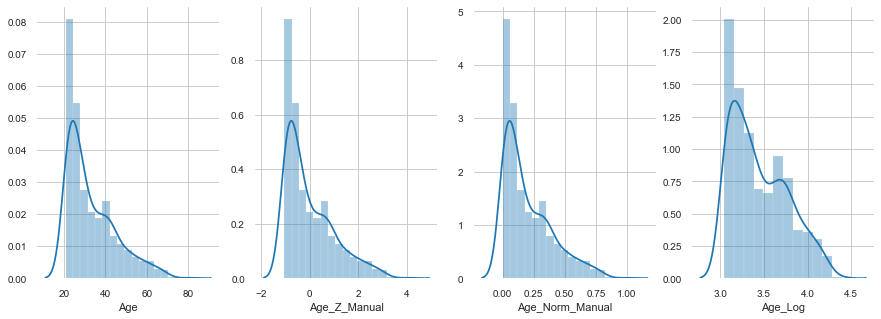

In [316]:
# Let's plot original, standardized, normalized, and log transformed Age fields
fig, axs = plt.subplots(ncols = 4, figsize = (15, 5))

sns.distplot(df['Age'], ax = axs[0])
sns.distplot(df['Age_Z_Manual'], ax = axs[1])
sns.distplot(df['Age_Norm_Manual'], ax = axs[2])
sns.distplot(df['Age_Log'], ax = axs[3]);

In [317]:
# Let's replace "Outcome" field in the standardized dataset with the original "Outcome" field
df_z['Outcome'] = df['Outcome']

In [333]:
# Create a list with features for plotting boxplots
features = [col for col in df_z.columns if col != 'Outcome']
features

['Pregnant',
 'Glucose',
 'Pressure',
 'Thickness',
 'Insulin',
 'Bmi',
 'Pedigree',
 'Age']

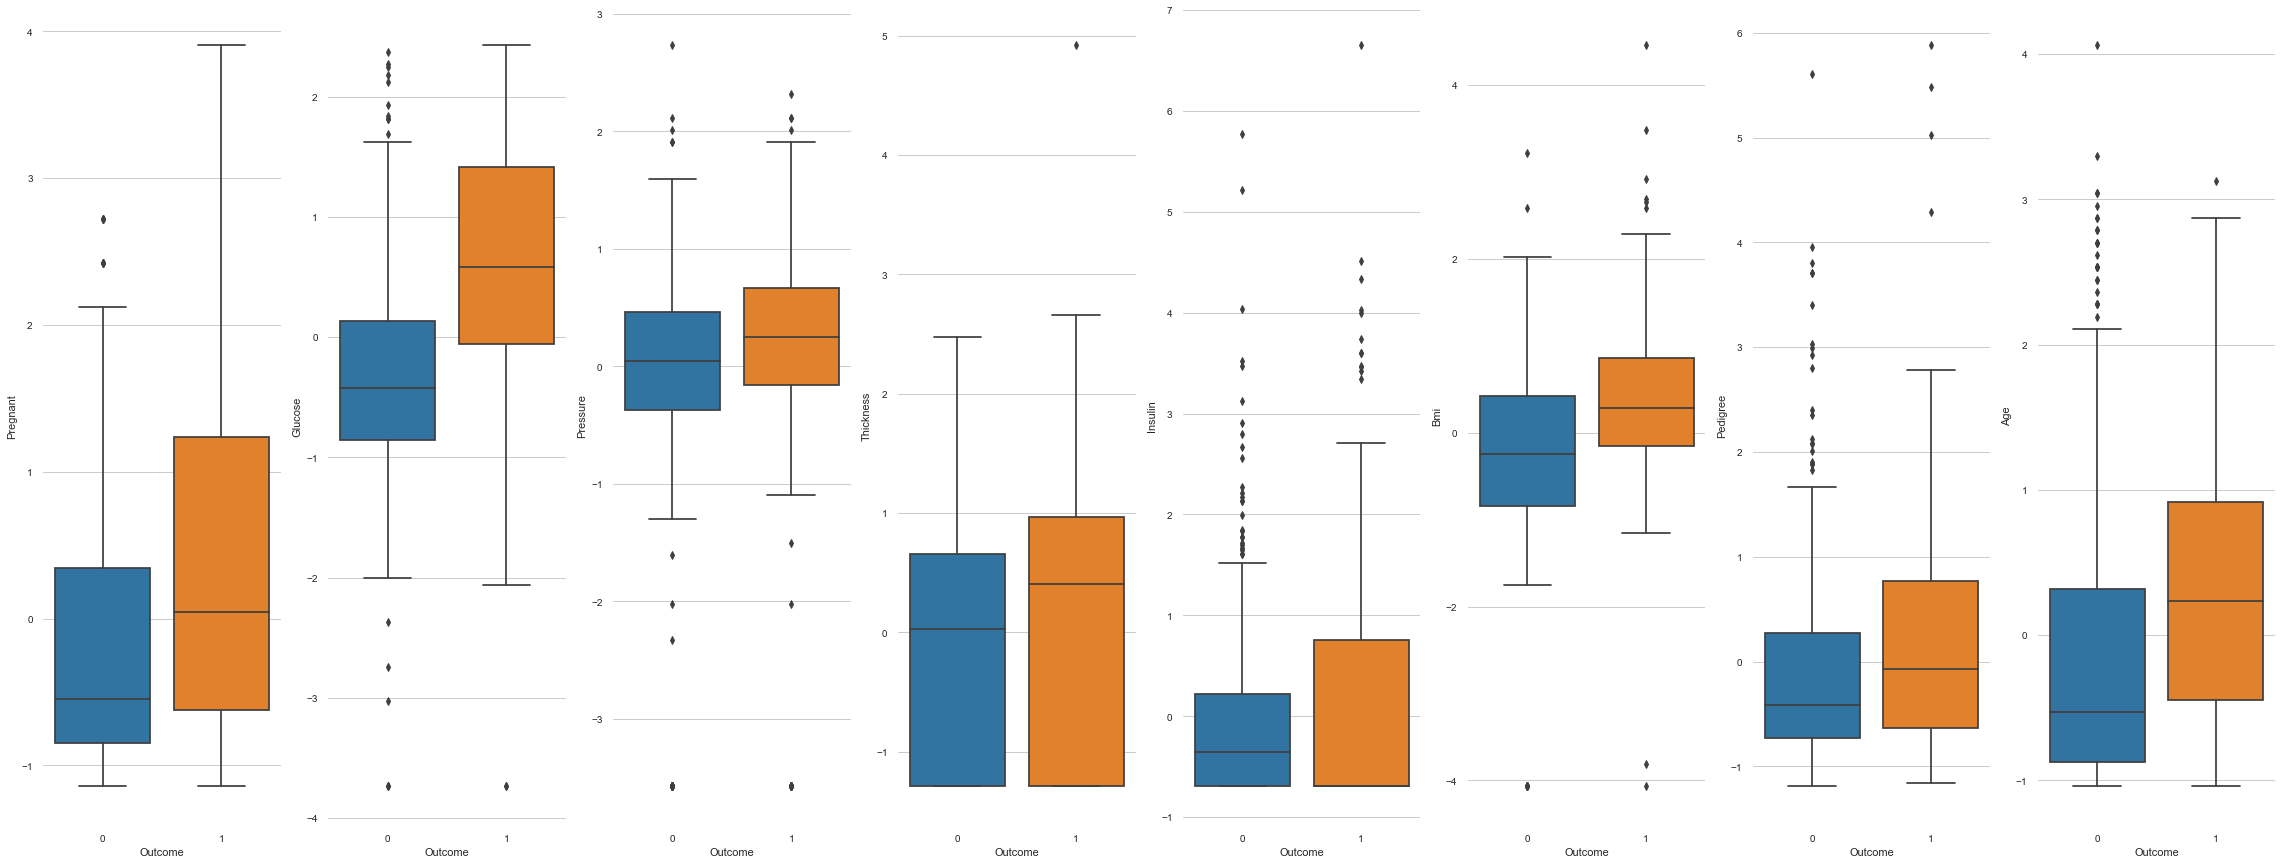

In [302]:
# Create boxplots to understand differences in distributions among people with and without diabetes
fig, axs = plt.subplots(ncols = len(features), figsize = (40, 15))

for idx, field in enumerate(features):
    sns.boxplot(x = 'Outcome', 
                y = field, 
                data = df_z,
                ax = axs[idx])

# <a id='link4'>Pandas Profiling</a>
#### Automated data profiling

In [303]:
# let us try pandas-profiling now and see how does it simplifies the EDA
!pip install pandas-profiling==2.8.0

In [304]:
# Loading dataframe again, so that original features are considered
data = pd.read_csv("pima-indians-diabetes.csv")

In [305]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof
# to view report created by pandas profile

In [306]:
prof.to_file(output_file='output.html')
# to save report obtained via pandas profiling

# Appendix



- **warnings.filterwarnings("ignore")** : Never print matching warnings
- **Pandas** : Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
- **Numpy** : The fundamental package for scientific computing with Python.
- **Matplotlib** : Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
- **Seaborn** : Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- **scipy.stats** : This module contains a large number of probability distributions as well as a growing library of statistical functions.
- **sklearn.preprocessing** : This package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators.